## Benchmark: toy 2

In [1]:
# imports
import os
import sys
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import torch_cae_multilevel_V4 as net
import torch_cae_skip_connection as net2

In [2]:
# load data
data_path = '../data/npy/toy2.npy'
dataset = net.MultiScaleDynamicsDataSet(data_path, n_levels=3)

### multilevel CAE with progressive refinements

In [3]:
archs = [[1,2,3,4],[1,2,3,4],[1,2,3,4]]
tols = [0.001, 0.0008, 0.0006]
net.train_net(archs=archs, dataset=dataset, max_epoch=5000, batch_size=350, 
              tols=tols, activation=torch.nn.Sequential(), w=0.5, model_path=model_path, 
              result_path=result_path, std=0.01, verbose=2)

*************************************************
Model @Level 0:
Perform deepening & widening, train each architectures ...
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/5000]
[training set] local: 0.0021/0.0038/0.0029, global: 0.0020/0.0043/0.0032
[validation set] local: 0.0022/0.0034/0.0028, global: 0.0021/0.0041/0.0031
epoch [500/5000]:
[training set] local: 0.0001/0.0017/0.0009, global: 0.0001/0.0017/0.0009
[validation set] local: 0.0001/0.0028/0.0014, global: 0.0001/0.0028/0.0014
epoch [1000/5000]:
[training set] local: 0.0001/0.0017/0.0009, global: 0.0001/0.0017/0.0009
[validation set] local: 0.0001/0.0028/0.0014, global: 0.0001/0.0028/0.0014
epoch [1500/5000]:
[training set] local: 0.0001/0.0017/0.0009, global: 0.0001/0.0017/0.0009
[validation set] local: 0.0001/0.0027/0.0014, global: 0.0001/0.0027/0.0014
epoch [2000/5000]:
[training set] local: 0.0001/0.0017/0.0009, global: 0.0001/0.0017/0.0009
[validation set] local: 0.0001/0.0027/0.0014, gl

epoch [1500/5000]:
[training set] local: 0.0000/0.0003/0.0002, global: 0.0000/0.0003/0.0002
[validation set] local: 0.0000/0.0004/0.0002, global: 0.0000/0.0004/0.0002
epoch [2000/5000]:
[training set] local: 0.0000/0.0003/0.0001, global: 0.0000/0.0003/0.0001
[validation set] local: 0.0000/0.0004/0.0002, global: 0.0000/0.0004/0.0002
epoch [2500/5000]:
[training set] local: 0.0000/0.0002/0.0001, global: 0.0000/0.0002/0.0001
[validation set] local: 0.0000/0.0004/0.0002, global: 0.0000/0.0004/0.0002
epoch [3000/5000]:
[training set] local: 0.0000/0.0002/0.0001, global: 0.0000/0.0002/0.0001
[validation set] local: 0.0000/0.0004/0.0002, global: 0.0000/0.0004/0.0002
epoch [3500/5000]:
[training set] local: 0.0000/0.0002/0.0001, global: 0.0000/0.0002/0.0001
[validation set] local: 0.0000/0.0003/0.0002, global: 0.0000/0.0003/0.0002
epoch [4000/5000]:
[training set] local: 0.0000/0.0002/0.0001, global: 0.0000/0.0002/0.0001
[validation set] local: 0.0000/0.0003/0.0002, global: 0.0000/0.0003/0.000

epoch [5000/5000]:
[training set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
[validation set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001

-------------------------------------------------
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/5000]
[training set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
[validation set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
epoch [500/5000]:
[training set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
[validation set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
epoch [1000/5000]:
[training set] local: 0.0000/0.0001/0.0000, global: 0.0000/0.0001/0.0000
[validation set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
epoch [2500/5000]:
[training set] local: 0.0000/0.0001/0.0000, global: 0.0000/0.0001/0.0000
[validation set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
epoch [3000/5000]:
[training set] local: 0.0000

In [ ]:
# result_path = '../result/toy2'
# results_1 = {}
# for file_name in sorted(os.listdir(result_path)):
#     if file_name.endswith('.dat'):
#         key, _ = file_name.split('.')
#         with open(os.path.join(result_path, file_name), 'rb') as f: 
#             records[key]= pickle.load(f)

### multilevel CAE with nonlinear activation functions (without progressive refinements)

In [4]:
arch = results_1['arch']
results_2 = net.train_net(arch=arch, dataset=dataset, max_epoch=5000, batch_size=350, tols=None,
                       activation=torch.nn.ReLU(), w=0.5, std=0.01)

*************************************************
Model @Level 0:
Perform deepening & widening, train each architectures ...
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/5000]
[training set] local: 0.0027/0.0049/0.0038, global: 0.0026/0.0052/0.0039
[validation set] local: 0.0028/0.0049/0.0038, global: 0.0028/0.0049/0.0039
epoch [500/5000]:
[training set] local: 0.0001/0.0017/0.0009, global: 0.0001/0.0017/0.0009
[validation set] local: 0.0001/0.0028/0.0014, global: 0.0001/0.0028/0.0014
epoch [1000/5000]:
[training set] local: 0.0001/0.0017/0.0009, global: 0.0001/0.0017/0.0009
[validation set] local: 0.0001/0.0028/0.0014, global: 0.0001/0.0028/0.0014
epoch [1500/5000]:
[training set] local: 0.0001/0.0017/0.0009, global: 0.0001/0.0017/0.0009
[validation set] local: 0.0001/0.0028/0.0014, global: 0.0001/0.0028/0.0014
epoch [2000/5000]:
[training set] local: 0.0001/0.0017/0.0009, global: 0.0001/0.0017/0.0009
[validation set] local: 0.0001/0.0027/0.0014, gl

epoch [1500/5000]:
[training set] local: 0.0000/0.0006/0.0003, global: 0.0000/0.0006/0.0003
[validation set] local: 0.0000/0.0009/0.0005, global: 0.0000/0.0009/0.0005
epoch [2000/5000]:
[training set] local: 0.0000/0.0005/0.0003, global: 0.0000/0.0006/0.0003
[validation set] local: 0.0000/0.0009/0.0004, global: 0.0000/0.0009/0.0004
epoch [2500/5000]:
[training set] local: 0.0000/0.0005/0.0003, global: 0.0000/0.0006/0.0003
[validation set] local: 0.0000/0.0008/0.0004, global: 0.0000/0.0008/0.0004
epoch [3000/5000]:
[training set] local: 0.0000/0.0005/0.0003, global: 0.0000/0.0006/0.0003
[validation set] local: 0.0000/0.0007/0.0004, global: 0.0000/0.0008/0.0004
epoch [3500/5000]:
[training set] local: 0.0000/0.0005/0.0003, global: 0.0000/0.0006/0.0003
[validation set] local: 0.0000/0.0007/0.0004, global: 0.0000/0.0007/0.0004
epoch [4000/5000]:
[training set] local: 0.0000/0.0005/0.0002, global: 0.0000/0.0005/0.0003
[validation set] local: 0.0000/0.0007/0.0004, global: 0.0000/0.0007/0.000

epoch [2500/5000]:
[training set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
[validation set] local: 0.0000/0.0002/0.0001, global: 0.0000/0.0002/0.0001
epoch [3000/5000]:
[training set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
[validation set] local: 0.0000/0.0002/0.0001, global: 0.0000/0.0002/0.0001
epoch [3500/5000]:
[training set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
[validation set] local: 0.0000/0.0002/0.0001, global: 0.0000/0.0002/0.0001
early stopping at 3500th iteration due to slow convergence!

-------------------------------------------------
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/5000]
[training set] local: 0.0001/0.0003/0.0002, global: 0.0001/0.0003/0.0002
[validation set] local: 0.0001/0.0003/0.0002, global: 0.0001/0.0003/0.0002
epoch [500/5000]:
[training set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
[validation set] local: 0.0000/0.0002/0.0001, global: 0.0000/0

### CAE with symmetric skipped connections & nonlinear activations

In [5]:
arch = results_1['arch']
n_params_3, errs_3 = net2.train_archs(arch=arch, activation=torch.nn.ReLU(), dataset=dataset, 
                                      base_epoch=5000, batch_size=350, w=0.5, std=0.01)

epoch [500/5000]:
[training set] local: 0.0193/0.0490/0.0342, global: 0.0112/0.0490/0.0301
[validation set] local: 0.0198/0.0533/0.0365, global: 0.0115/0.0533/0.0324
epoch [1000/5000]:
[training set] local: 0.0116/0.0349/0.0232, global: 0.0089/0.0349/0.0219
[validation set] local: 0.0114/0.0382/0.0248, global: 0.0086/0.0382/0.0234
epoch [1500/5000]:
[training set] local: 0.0098/0.0257/0.0177, global: 0.0086/0.0257/0.0171
[validation set] local: 0.0092/0.0283/0.0188, global: 0.0080/0.0283/0.0182
epoch [2000/5000]:
[training set] local: 0.0092/0.0204/0.0148, global: 0.0086/0.0204/0.0145
[validation set] local: 0.0085/0.0224/0.0155, global: 0.0080/0.0224/0.0152
epoch [2500/5000]:
[training set] local: 0.0088/0.0174/0.0131, global: 0.0086/0.0174/0.0130
[validation set] local: 0.0081/0.0192/0.0136, global: 0.0079/0.0192/0.0135
epoch [3000/5000]:
[training set] local: 0.0084/0.0155/0.0119, global: 0.0082/0.0155/0.0119
[validation set] local: 0.0077/0.0171/0.0124, global: 0.0076/0.0171/0.0124

epoch [12000/30000]:
[training set] local: 0.0006/0.0030/0.0018, global: 0.0004/0.0030/0.0017
[validation set] local: 0.0006/0.0032/0.0019, global: 0.0004/0.0032/0.0018
epoch [15000/30000]:
[training set] local: 0.0005/0.0023/0.0014, global: 0.0003/0.0023/0.0013
[validation set] local: 0.0004/0.0024/0.0014, global: 0.0003/0.0024/0.0014
epoch [18000/30000]:
[training set] local: 0.0004/0.0021/0.0012, global: 0.0003/0.0021/0.0012
[validation set] local: 0.0004/0.0022/0.0013, global: 0.0003/0.0022/0.0012
epoch [21000/30000]:
[training set] local: 0.0004/0.0020/0.0012, global: 0.0003/0.0020/0.0012
[validation set] local: 0.0004/0.0021/0.0012, global: 0.0003/0.0021/0.0012
epoch [24000/30000]:
[training set] local: 0.0004/0.0020/0.0012, global: 0.0003/0.0020/0.0012
[validation set] local: 0.0004/0.0022/0.0013, global: 0.0003/0.0022/0.0012
epoch [27000/30000]:
[training set] local: 0.0004/0.0020/0.0012, global: 0.0003/0.0020/0.0011
[validation set] local: 0.0004/0.0022/0.0013, global: 0.0003/

epoch [22000/55000]:
[training set] local: 0.0166/0.0267/0.0216, global: 0.0166/0.0267/0.0216
[validation set] local: 0.0162/0.0244/0.0203, global: 0.0162/0.0244/0.0203
epoch [27500/55000]:
[training set] local: 0.0166/0.0267/0.0216, global: 0.0166/0.0267/0.0216
[validation set] local: 0.0161/0.0244/0.0203, global: 0.0161/0.0244/0.0203
epoch [33000/55000]:
[training set] local: 0.0166/0.0267/0.0216, global: 0.0166/0.0267/0.0216
[validation set] local: 0.0161/0.0244/0.0203, global: 0.0161/0.0244/0.0203
epoch [38500/55000]:
[training set] local: 0.0166/0.0267/0.0216, global: 0.0166/0.0267/0.0216
[validation set] local: 0.0161/0.0244/0.0203, global: 0.0161/0.0244/0.0203
early stopping at 38500th iteration due to slow convergence!
-------------------------------------------------
epoch [6000/60000]:
[training set] local: 0.0007/0.0031/0.0019, global: 0.0007/0.0031/0.0019
[validation set] local: 0.0007/0.0034/0.0020, global: 0.0007/0.0034/0.0020
epoch [12000/60000]:
[training set] local: 0.

### Linear CAE with skipped connection

In [6]:
arch = results_1['arch']
n_params_4, errs_4 = net2.train_archs(arch=arch, activation=torch.nn.Sequential(), dataset=dataset, 
                                      base_epoch=5000, batch_size=350, w=0.5, std=0.01)

epoch [500/5000]:
[training set] local: 0.0189/0.0487/0.0338, global: 0.0111/0.0487/0.0299
[validation set] local: 0.0194/0.0529/0.0361, global: 0.0113/0.0529/0.0321
epoch [1000/5000]:
[training set] local: 0.0115/0.0348/0.0231, global: 0.0088/0.0348/0.0218
[validation set] local: 0.0112/0.0381/0.0247, global: 0.0085/0.0381/0.0233
epoch [1500/5000]:
[training set] local: 0.0098/0.0256/0.0177, global: 0.0086/0.0256/0.0171
[validation set] local: 0.0092/0.0283/0.0187, global: 0.0080/0.0283/0.0182
epoch [2000/5000]:
[training set] local: 0.0092/0.0202/0.0147, global: 0.0086/0.0202/0.0144
[validation set] local: 0.0085/0.0224/0.0154, global: 0.0080/0.0224/0.0152
epoch [2500/5000]:
[training set] local: 0.0088/0.0173/0.0130, global: 0.0086/0.0173/0.0129
[validation set] local: 0.0081/0.0190/0.0136, global: 0.0079/0.0190/0.0135
epoch [3000/5000]:
[training set] local: 0.0083/0.0155/0.0119, global: 0.0082/0.0155/0.0118
[validation set] local: 0.0077/0.0170/0.0124, global: 0.0076/0.0170/0.0123

epoch [9000/30000]:
[training set] local: 0.0006/0.0033/0.0020, global: 0.0005/0.0033/0.0019
[validation set] local: 0.0006/0.0036/0.0021, global: 0.0005/0.0036/0.0020
epoch [12000/30000]:
[training set] local: 0.0005/0.0026/0.0015, global: 0.0004/0.0026/0.0015
[validation set] local: 0.0005/0.0027/0.0016, global: 0.0004/0.0027/0.0015
epoch [15000/30000]:
[training set] local: 0.0003/0.0019/0.0011, global: 0.0002/0.0019/0.0010
[validation set] local: 0.0003/0.0020/0.0011, global: 0.0002/0.0020/0.0011
epoch [18000/30000]:
[training set] local: 0.0002/0.0018/0.0010, global: 0.0001/0.0018/0.0010
[validation set] local: 0.0002/0.0017/0.0010, global: 0.0001/0.0017/0.0009
epoch [21000/30000]:
[training set] local: 0.0002/0.0018/0.0010, global: 0.0001/0.0018/0.0009
[validation set] local: 0.0002/0.0017/0.0010, global: 0.0001/0.0017/0.0009
epoch [24000/30000]:
[training set] local: 0.0002/0.0018/0.0010, global: 0.0001/0.0018/0.0010
[validation set] local: 0.0002/0.0017/0.0010, global: 0.0001/0

epoch [16500/55000]:
[training set] local: 0.0001/0.0007/0.0004, global: 0.0001/0.0007/0.0004
[validation set] local: 0.0001/0.0007/0.0004, global: 0.0001/0.0007/0.0004
epoch [22000/55000]:
[training set] local: 0.0001/0.0006/0.0003, global: 0.0001/0.0006/0.0003
[validation set] local: 0.0001/0.0006/0.0003, global: 0.0001/0.0006/0.0003
epoch [27500/55000]:
[training set] local: 0.0001/0.0006/0.0003, global: 0.0001/0.0006/0.0003
[validation set] local: 0.0001/0.0005/0.0003, global: 0.0001/0.0005/0.0003
epoch [33000/55000]:
[training set] local: 0.0001/0.0005/0.0003, global: 0.0001/0.0005/0.0003
[validation set] local: 0.0001/0.0005/0.0003, global: 0.0001/0.0005/0.0003
epoch [38500/55000]:
[training set] local: 0.0001/0.0005/0.0003, global: 0.0001/0.0005/0.0003
[validation set] local: 0.0001/0.0004/0.0003, global: 0.0001/0.0004/0.0003
epoch [44000/55000]:
[training set] local: 0.0001/0.0004/0.0002, global: 0.0001/0.0004/0.0002
[validation set] local: 0.0001/0.0004/0.0002, global: 0.0001/

### err - # of params 

Text(0,0.5,'log(validation error)')

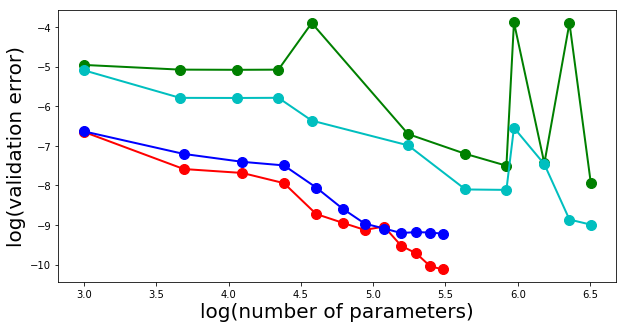

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(np.log(results_1['n_params']), np.log(results_1['best_val_errs']), 'r-o', markersize=10, linewidth=2.0)
plt.plot(np.log(results_2['n_params']), np.log(results_2['best_val_errs']), 'b-o', markersize=10, linewidth=2.0)
plt.plot(np.log(n_params_3), np.log(errs_3), 'g-o', markersize=10, linewidth=2.0)
plt.plot(np.log(n_params_4), np.log(errs_4), 'c-o', markersize=10, linewidth=2.0)
plt.xlabel('log(number of parameters)', fontsize=20)
plt.ylabel('log(validation error)', fontsize=20)

### err - # of encodings

In [8]:
# compute the size of encodings 
arch_diff = list()
for l in arch:
    arch_diff.append([1] + [l[i] - l[i-1] for i in range(1, len(l))])

size_of_maps = list()
for i in range(len(arch)):
    size_of_maps.append([np.multiply(*results_1['model'].resolved_maps[str(i)]['0'].size())])
    for j in range(len(results_1['model'].resolved_maps[str(i)]) - 1):
        n1 = int(torch.sum(1 - results_1['model'].resolved_maps[str(i)][str(j)]))
        size_of_maps[i].append(n1)

n_encodings_1 = [0]
n_encodings_234 = [0]
for i in range(len(arch_diff)):
    n_encodings_1.append(n_encodings_1[-1] + size_of_maps[i][0])
    n_encodings_234.append(n_encodings_234[-1] + size_of_maps[i][0])
    for j in range(1, len(arch_diff[i])):
        # add_size = min(size_of_maps[i][j]*(2+arch_diff[i][j]), size_of_maps[i][0]*arch_diff[i][j])
        add_size = size_of_maps[i][j] * arch_diff[i][j]
        n_encodings_1.append(n_encodings_1[-1] + add_size)
        n_encodings_234.append(n_encodings_234[-1] + size_of_maps[i][0]*arch_diff[i][j])

n_encodings_1 = n_encodings_1[1:]
n_encodings_234 = n_encodings_234[1:]

Text(0,0.5,'log(validation error)')

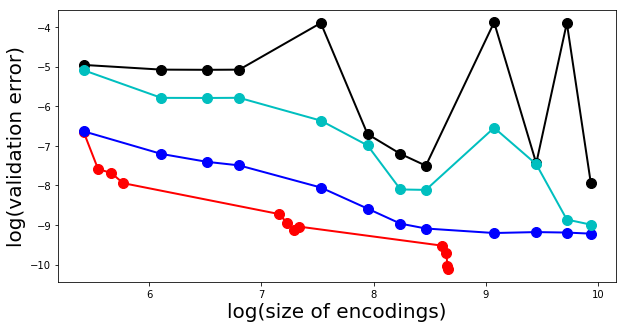

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(np.log(n_encodings_1), np.log(results_1['best_val_errs']), 'r-o', markersize=10, linewidth=2.0)
plt.plot(np.log(n_encodings_234), np.log(results_2['best_val_errs']), 'b-o', markersize=10, linewidth=2.0)
plt.plot(np.log(n_encodings_234), np.log(errs_3), 'k-o', markersize=10, linewidth=2.0)
plt.plot(np.log(n_encodings_234), np.log(errs_4), 'c-o', markersize=10, linewidth=2.0)
plt.xlabel('log(size of encodings)', fontsize=20)
plt.ylabel('log(validation error)', fontsize=20)